# Klasifikasi Gambar Sensor EWS Trafo Menggunakan Metode CNN

## Alfendio Alif Faudisyah - FTI UKSW

# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Build and Recognize Dataset

## Dataset Standardization

In [2]:
# 256 X 256 to 180 X 180
img_height = 180
img_width = 180
batch_size = 32 

## Build Dataset

In [3]:
training_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Training', 
            image_size=(img_height, img_width), batch_size=batch_size)
            
testing_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Testing',        
            image_size=(img_height, img_width), batch_size=batch_size)

Found 5928 files belonging to 6 classes.
Found 1482 files belonging to 6 classes.


## Find Class Names

In [4]:
class_names = training_ds.class_names
print("Training dataset: ",class_names)

class_names = testing_ds.class_names
print("Testing dataset: ",class_names)

Training dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']
Testing dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']


## Dataset Visualization

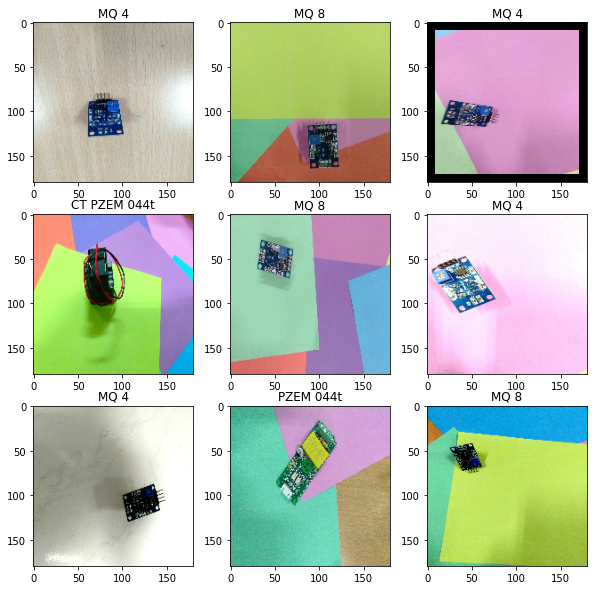

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])

## Tuning

In [6]:
# Tune dataset 
# Membuat data ada di memori
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Build Classification Model

## Create CNN Model

In [7]:
# Class target < - 6 class
num_classes = 6

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling menjadi greyscale
    layers.Conv2D(16, 3, padding='same', activation='relu'), # membuat convolutional layer 2D
    layers.MaxPooling2D(), # membuat max pooling layer 2D -> menyimpan feature yang akan kita simpan, menyimpan pooling dari conv 2D
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # dropout layer -> menghilangkan neuron yang tidak terlalu penting, mengurangi overfitting
    layers.Flatten(), # flatten layer -> mengubah bentuk 2D menjadi array 1D
    layers.Dense(128, activation='relu'), # mencari hubungan dari maxpoling 2D yang didapatkan, flatten
    layers.Dense(num_classes) # output layer
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [9]:
# Compile Model CNN
# Compile model untuk melakukan training
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train Model

In [10]:
# Train Model 
epochs = 10

# Simpan dalam history
history = model.fit( 
    training_ds,
    epochs=epochs
)

Epoch 1/10
186/186 [==============================] - 219s 967ms/step - loss: 0.9656 - accuracy: 0.6385
Epoch 2/10
186/186 [==============================] - 167s 862ms/step - loss: 0.2548 - accuracy: 0.9116
Epoch 3/10
186/186 [==============================] - 171s 887ms/step - loss: 0.1362 - accuracy: 0.9519
Epoch 4/10
186/186 [==============================] - 162s 839ms/step - loss: 0.0847 - accuracy: 0.9740
Epoch 5/10
186/186 [==============================] - 156s 808ms/step - loss: 0.0595 - accuracy: 0.9804
Epoch 6/10
186/186 [==============================] - 160s 824ms/step - loss: 0.0300 - accuracy: 0.9897
Epoch 7/10
186/186 [==============================] - 169s 881ms/step - loss: 0.0378 - accuracy: 0.9885
Epoch 8/10
186/186 [==============================] - 249s 1s/step - loss: 0.0382 - accuracy: 0.9879
Epoch 9/10
186/186 [==============================] - 218s 1s/step - loss: 0.0514 - accuracy: 0.9833
Epoch 10/10
186/186 [==============================] - 233s 1s/step - 

## Training Visualization

Text(0.5, 1.0, 'Training Accuracy & Loss')

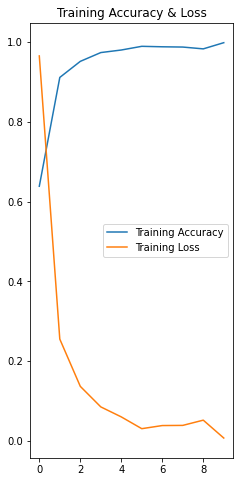

In [15]:
# Visualisasi Training Akurasi 
acc = history.history['accuracy']

# Visualisasi Training Loss
loss = history.history['loss']

# Epochs 
epochs_range = range(epochs)
plt.figure(figsize=(8, 8)) # Tampilan dalam figure

plt.subplot(1, 2, 1) # Tampilan sisi per sisi
plt.plot(epochs_range, acc, label='Training Accuracy') # Plot akurasi training
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='right') 
plt.title('Training Accuracy & Loss')

# Testing Model

## Testing Accuracy

In [16]:
test_loss, test_acc = model.evaluate(testing_ds, verbose=2)
print('\nTest accuracy:', test_acc)

47/47 - 55s - loss: 1.3464 - accuracy: 0.7679 - 55s/epoch - 1s/step

Test accuracy: 0.7678812146186829


## Testing Visualization

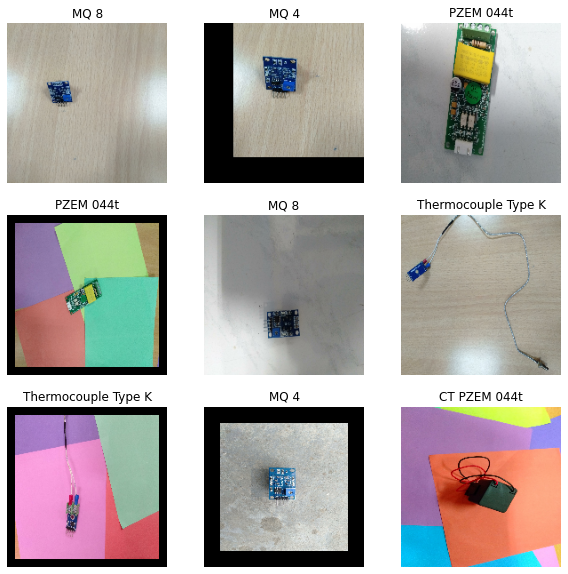

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Prediction

## Get the Label Names and Convert Into a NumPy Ainrray

In [18]:
class_names = np.array(class_names)

print(class_names)

['CT PZEM 044t' 'LM 35' 'MQ 4' 'MQ 8' 'PZEM 044t' 'Thermocouple Type K']


## Create an Image Batch and Make Predictions

In [19]:
image_batch, label_batch = next(iter(testing_ds))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

print(predicted_class_names)

1/1 [==============================] - 0s 243ms/step
['PZEM 044t' 'MQ 8' 'CT PZEM 044t' 'PZEM 044t' 'LM 35' 'CT PZEM 044t'
 'MQ 4' 'PZEM 044t' 'MQ 4' 'MQ 4' 'PZEM 044t' 'CT PZEM 044t' 'MQ 4'
 'LM 35' 'Thermocouple Type K' 'Thermocouple Type K' 'MQ 8' 'MQ 8'
 'CT PZEM 044t' 'MQ 4' 'LM 35' 'Thermocouple Type K' 'MQ 4' 'LM 35' 'MQ 4'
 'PZEM 044t' 'Thermocouple Type K' 'MQ 8' 'PZEM 044t' 'LM 35'
 'Thermocouple Type K' 'MQ 4']


## Print True Labels and Predicted Indices

In [20]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [4 2 0 4 1 0 5 4 3 3 4 0 3 1 5 5 2 2 0 5 1 1 3 1 3 4 5 2 4 1 5 4]
Predicted labels:  [4 3 0 4 1 0 2 4 2 2 4 0 2 1 5 5 3 3 0 2 1 5 2 1 2 4 5 3 4 1 5 2]


## Plot Model Predictions

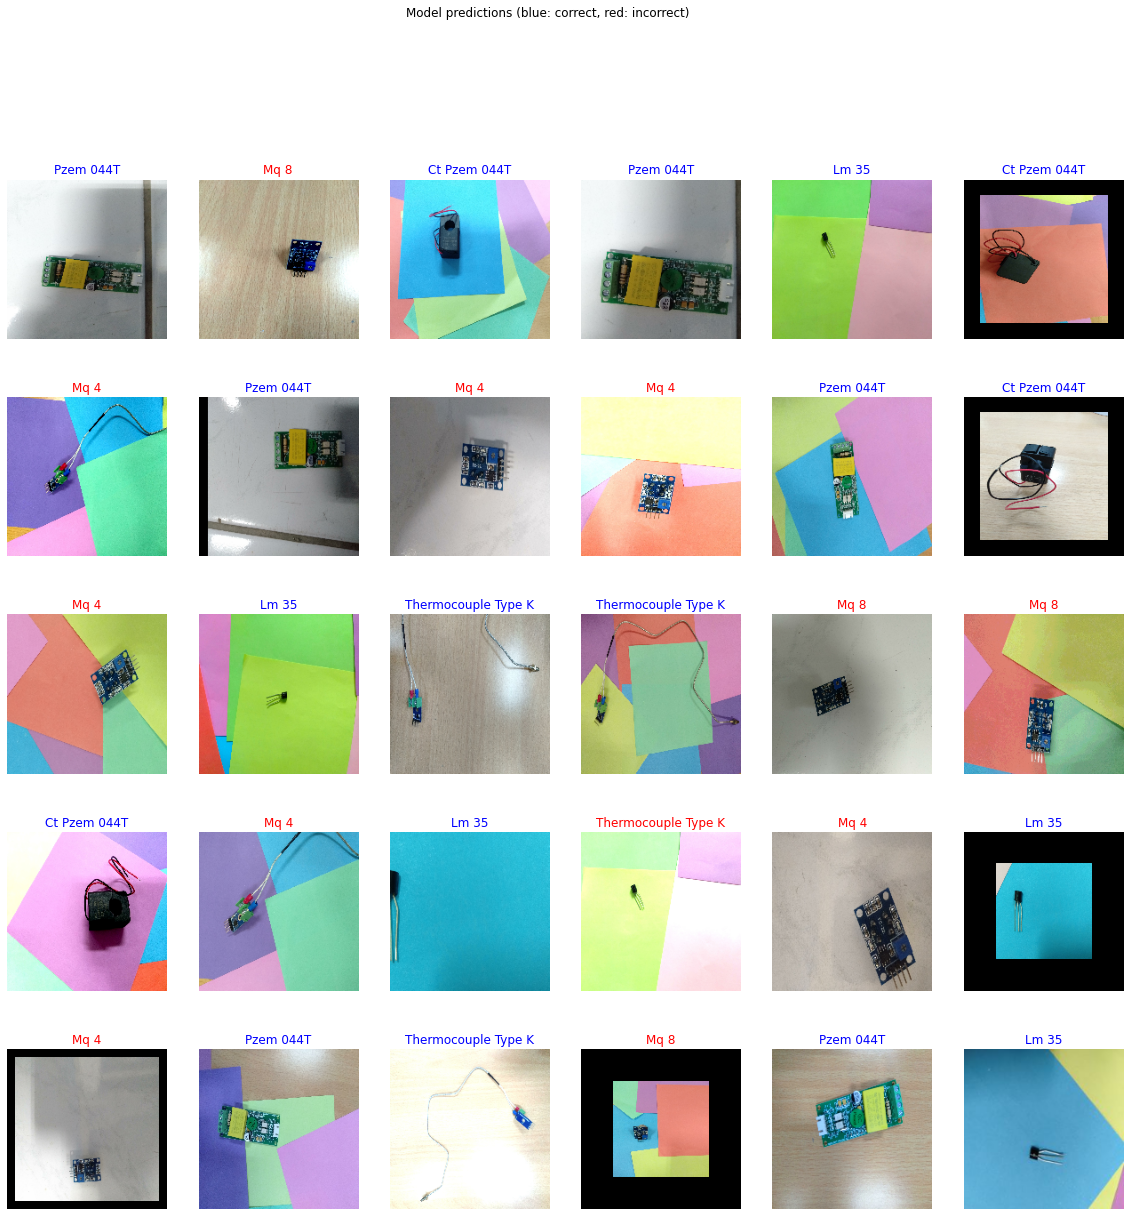

In [24]:
plt.figure(figsize=(20, 20))
for n in range(30):
    plt.subplot(5, 6, n+1)
    plt.subplots_adjust(hspace=0.)
    plt.imshow(image_batch[n].astype("uint8"))
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
    plt.suptitle("Model predictions (blue: correct, red: incorrect)")

   # print sendiri nama gambar hasil prediksi
   

# Confidence Score

In [25]:
test_url = "https://static-01.daraz.pk/p/e44b816c6cddd662218fe8a6ab226594.jpg"
test_path = tf.keras.utils.get_file('', origin=test_url)

img = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("Gambar ini adalah {} dengan akurasi {:.2f}%.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 1s 1s/step
Gambar ini adalah CT PZEM 044t dengan akurasi 100.00%.


# Save the model

In [26]:
model.save ("Save model/model_percobaan_13")

INFO:tensorflow:Assets written to: Save model/model_percobaan_13\assets


INFO:tensorflow:Assets written to: Save model/model_percobaan_13\assets


In [27]:
model.save ("Save model/model_percobaan_13.h5")

In [31]:
model_json = model.to_json()
with open("Save model/model_percobaan_13.json", "w") as json_file:
    json_file.write(model_json)

# Evaluate/Testing

In [33]:
from keras.models import model_from_json
json_file = open('Save model/model_percobaan_13.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

load_model = model_from_json(loaded_model_json)
load_model.load_weights("Save model/model_percobaan_13.h5")
print("Loaded model from disk")

Loaded model from disk


## Model Evaluation using Confusion Matrix

- Accuracy = (TP + TN) / (TP + FP + + FN + TN)
- Recall = (TP) / (TP + FN)
- Precision = (TP) / (TP + FP)
- F1 Score = (2 x (Precision x Recall)) / (Precision + Recall)

In [35]:
import sklearn

In [46]:
from keras.preprocessing.image import ImageDataGenerator

In [48]:
testing_ds_generator = ImageDataGenerator(rescale=1./255)
testing_ds = testing_ds_generator.flow_from_directory(
    'C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_4/Testing',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False)

Found 1482 images belonging to 6 classes.


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

prediction = model.predict_generator(testing_ds)
y_pred = np.argmax(prediction, axis = 1)

print(confusion_matrix(testing_ds.classes, y_pred))

<ipython-input-51-2a4a13df4184>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction = model.predict_generator(testing_ds)


[[  0 247   0   0   0   0]
 [  0 247   0   0   0   0]
 [  0 247   0   0   0   0]
 [  0 247   0   0   0   0]
 [  0 247   0   0   0   0]
 [  0 247   0   0   0   0]]


In [52]:
print(classification_report(testing_ds.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.17      1.00      0.29       247
           2       0.00      0.00      0.00       247
           3       0.00      0.00      0.00       247
           4       0.00      0.00      0.00       247
           5       0.00      0.00      0.00       247

    accuracy                           0.17      1482
   macro avg       0.03      0.17      0.05      1482
weighted avg       0.03      0.17      0.05      1482



c:\Users\alfen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Note

> Total dataset: 7410
- Training (80%) = 5928
- Testing (20%) = 1482

> Jenis:
- CT = Sensor
- PZEM 044t = Sensor
- Thermocouple Type K = Driver (Bagian hijau MAX6675), Sensor yang panjang
- MQ 4 = Cuma modul karena sensornya mirip dengan MQ8
- MQ 8 = Cuma modul karena sensornya mirip dengan MQ4
- LM 35 = Sensor

# Alfendio Alif Faudisyah&copy;
## 2022